In [1]:
import pandas as pd
from sklearn import datasets
data = datasets.load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.value_counts(['target'])

target
1         357
0         212
dtype: int64

<AxesSubplot:>

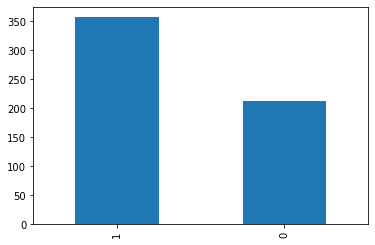

In [2]:
df['target'].value_counts().plot.bar()

<AxesSubplot:>

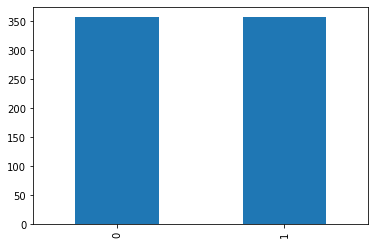

In [3]:
from sklearn.utils import resample
df_maj = df[df['target'] == 1]
df_min = df[df['target'] == 0]
df_min = resample(df_min, replace=True, n_samples= 357, random_state=2)
df_upsamp = pd.concat([df_min, df_maj])
df_upsamp['target'].value_counts().plot.bar()

In [4]:
X = df_upsamp.iloc[:, :-1]
from sklearn import preprocessing
X = preprocessing.scale(X)
y = df_upsamp['target']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

0.9888268156424581


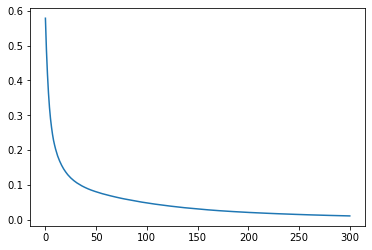

In [5]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(max_iter=600)
model.fit(X_train,y_train)
print(model.score(X_test,y_test))
import matplotlib.pyplot as plt
plt.plot(model.loss_curve_)